In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from tabulate import tabulate
from multiprocessing import Pool
from scipy.ndimage import uniform_filter1d
import matplotlib.colors as mcolors
import tqdm.notebook as tqdm

# import the C++ module
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as backend
import Simulate_System as SimSys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/super_simple_simulation/')

import Super_Simple_System as SSSys
import Super_Simple_Stochastic_Matrix as SSSMatrix


In [2]:
# define the unit of the system :
R = 50
L = 100
Eb = -10.
kdiff = 0.000207352
size = 100
dangling = True

In [20]:
Sys = backend.Gillespie(ell_tot=L,rho0=0.,BindingEnergy=Eb,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=3,dimension=1)
Sys_2 = backend.Gillespie(ell_tot=L,rho0=0.,BindingEnergy=Eb,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=20,dimension=3)
Sys_3 = backend.Gillespie(ell_tot=L,rho0=0.,BindingEnergy=-1,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=20,dimension=3)

In [21]:
Sim = SimSys.Simulation(step_tot = 10**4,size=100,L_size=100,Gillespie = Sys)
Sim.simulate_eq_distribution()
print('sim1 done')
Sim_2 = SimSys.Simulation(step_tot = 10**4,size=100,L_size=100,Gillespie = Sys_2)
Sim_2.simulate_eq_distribution()
print('sim2 done')
Sim_3 = SimSys.Simulation(step_tot = 10**4,size=100,L_size=100,Gillespie = Sys_3)
Sim_3.simulate_eq_distribution()

sim1 done
sim2 done


In [22]:
def make_2D_statistics(R,bins=100):
    #bins=100
    maxR = np.max(R)
    if R.shape[1] != 2 :
        print('The shape of the array does not match the function, expected (N,2) : 2 linkers ')
    def I(r):
        return int(r/maxR*(bins-1))
    X,Y = np.linspace(0,maxR,bins),np.linspace(0,maxR,bins)
    X,Y = np.meshgrid(X,Y)
    PR2D = np.zeros((bins,bins),dtype=float)
    for r in tqdm.tqdm(R):
        try:
            PR2D[I(np.linalg.norm(r[0])),I(np.linalg.norm(r[1]))] += 1/R.shape[0]
        except IndexError:
            pass
    return X,Y,PR2D


In [23]:
#with Pool(10) as p:
#    res = p.map(make_2D_statistics,np.array([Sim.R[i*Sim.R.shape[0]//10:(i+1)*Sim.R.shape[0]//10] for i in range(10)]))
X,Y,Z = make_2D_statistics(Sim.R)

  0%|          | 0/10000 [00:00<?, ?it/s]

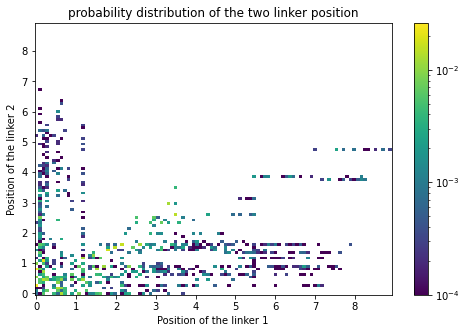

In [24]:
fig,ax = plt.subplots(figsize=(8,5))
psm = ax.pcolormesh(X,Y,Z,norm=mcolors.LogNorm())
ax.set_xlabel('Position of the linker 1')
ax.set_ylabel('Position of the linker 2')
ax.set_title('probability distribution of the two linker position')
cba = plt.colorbar(psm)

In [25]:
X,Y = compute_2_body_dist_prob(Sim.R)
X2,Y2 = compute_2_body_dist_prob(Sim_2.R)
X3,Y3 = compute_2_body_dist_prob(Sim_3.R)

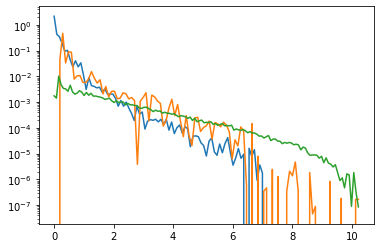

In [26]:
plt.plot(X,Y)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.yscale('log')

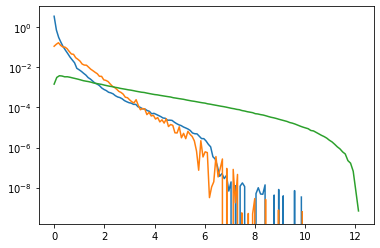

In [ ]:
plt.plot(X,Y)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.yscale('log')

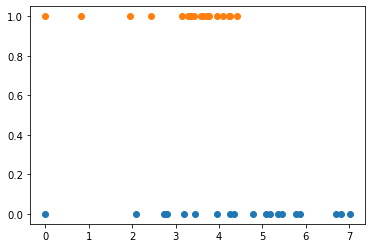

In [16]:
plt.scatter(np.linalg.norm(Sys_3.get_r(),axis=1),[0 for _ in range(20)])
plt.scatter(np.linalg.norm(Sys_2.get_r(),axis=1),[1 for _ in range(20)])

# Simulate a bigger system
the goal is to investigate whether the system can be non-ergodic.

In [42]:
Sys = backend.Gillespie(ell_tot=100,rho0=0.,BindingEnergy=Eb,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=100,dimension=3)
Sys2 = backend.Gillespie(ell_tot=100,rho0=0.,BindingEnergy=Eb,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=100,dimension=3)
Sys3 = backend.Gillespie(ell_tot=100,rho0=0.,BindingEnergy=Eb,kdiff=kdiff*5,seed = np.random.randint(0,1000000),Nlinker=100,dimension=3)

In [43]:
Sim1 = SimSys.Simulation(step_tot = 10**4,size=100,L_size=100,Gillespie = Sys)
Sim1.simulate_eq_distribution()
Sim3 = SimSys.Simulation(step_tot = 10**5,size=100,L_size=100,Gillespie = Sys2)
Sim3.simulate_eq_distribution()
Sim2 = SimSys.Simulation(step_tot = 10**6,size=100,L_size=100,Gillespie = Sys3)
Sim2.simulate_eq_distribution()


In [44]:
X,Y = compute_2_body_dist_prob(Sim.R)
X2,Y2 = compute_2_body_dist_prob(Sim2.R)
X3,Y3 = compute_2_body_dist_prob(Sim3.R)

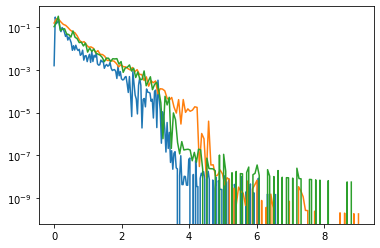

In [45]:
plt.plot(X,Y)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.yscale('log')

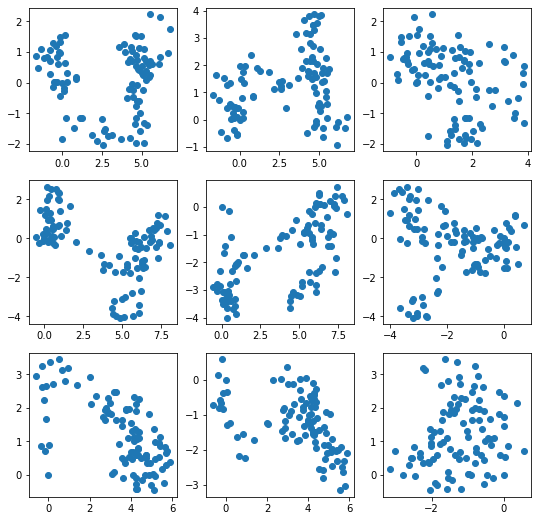

In [51]:
fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(9,9))
ax[0,1].scatter(Sys.get_r()[:,0],Sys.get_r()[:,1])
ax[0,0].scatter(Sys.get_r()[:,0],Sys.get_r()[:,2])
ax[0,2].scatter(Sys.get_r()[:,1],Sys.get_r()[:,2])

ax[1,1].scatter(Sys2.get_r()[:,0],Sys2.get_r()[:,1])
ax[1,0].scatter(Sys2.get_r()[:,0],Sys2.get_r()[:,2])
ax[1,2].scatter(Sys2.get_r()[:,1],Sys2.get_r()[:,2])

ax[2,1].scatter(Sys3.get_r()[:,0],Sys3.get_r()[:,1])
ax[2,0].scatter(Sys3.get_r()[:,0],Sys3.get_r()[:,2])
ax[2,2].scatter(Sys3.get_r()[:,1],Sys3.get_r()[:,2])